<h1 style='color: blue; font-size: 36px; font-weight: bold;'>Data Leakage ⚠</h1>

<h1 style='color: red; font-size: 24px; font-weight: bold;'>Teoria 📃</h1>

👉 Divide-se o dataset em 3 conjuntos: Treino, Teste e Validação. O objetivo é identificar se o modelo irá performar bem com um novo dataset. Passando de apenas um modelo generalizado para um modelo que irá ler dados nunca antes vistos.

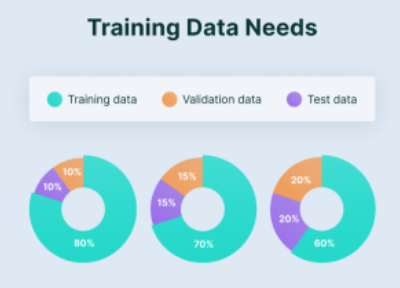

👉 Na tradução literal data leakage significa vazamento de dados. Um data leakage acontece quando aquelas informações presentes no conjunto de dados de treinamento são compartilhadas com os dados de teste

<h1 style='color: red; font-size: 24px; font-weight: bold;'>Imports 🤖</h1>

In [17]:
#Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#SKLearn
from sklearn.feature_selection import SelectKBest #Selecção de Features
from sklearn.model_selection import train_test_split #Divisão de treino e teste

#Model
from sklearn.linear_model import LogisticRegression #modelo de regressão logística

#Metric
from sklearn.metrics import accuracy_score #AUC Score

<h1 style='color: red; font-size: 24px; font-weight: bold;'>Build data 📚</h1>

👉 Cria-se uma base de dados aleatórios com 500 amostras e 10.000 features e com target binário

In [4]:
X = np.random.randn(500,10000)
y = np.random.choice(2, size=500)

In [9]:
df = pd.DataFrame(data=X, #Passando os dados X
                  columns=[f'feature_{i}' for i in range(X.shape[1])] #Criando o nome das features
                 )
df['target'] = y #Adicionando o target

df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_9991,feature_9992,feature_9993,feature_9994,feature_9995,feature_9996,feature_9997,feature_9998,feature_9999,target
0,0.504857,1.156651,-0.995528,-0.470998,-0.981005,0.272975,-2.819420,1.746736,-1.479509,-0.724266,...,-1.161993,0.622182,0.593197,-0.478224,-0.142511,1.007224,-1.257297,-0.687414,0.332956,1
1,0.791714,1.644216,0.815489,0.893051,-0.102945,-0.312519,1.626011,0.212501,0.781047,-0.198105,...,-0.143962,-1.018391,-0.714593,0.097634,-0.712774,-1.967517,0.170436,-1.077448,-0.234044,1
2,0.655062,-0.505574,-0.385567,-0.707049,0.456364,0.200245,1.552273,-1.614581,-0.380771,-0.524742,...,-2.730854,-0.282998,0.456180,-1.160454,1.071041,0.441590,0.913107,1.417693,-1.476256,0
3,0.940710,-0.300156,1.446153,3.020274,-0.245829,-0.614314,-0.804235,0.609559,-1.732960,2.350295,...,-0.914062,1.416939,-0.342095,1.228009,-0.349371,0.048218,-0.424227,-0.255204,-1.098316,0
4,0.445657,-0.003514,-0.757137,0.606278,1.371487,-0.000381,1.266952,0.710824,0.887990,-0.370327,...,-0.702725,-0.629460,1.128164,-1.634255,0.352565,-0.274063,0.815969,1.294718,-1.398791,0


<h1 style='color: red; font-size: 24px; font-weight: bold;'>Build model 🤖</h1>

* ###  Antes do split

O método consiste em realizar modificações no dataset inicial e só depois fazer a divisão em treino e teste

In [37]:
#Primeiro vamos selecionar as melhores features do dataset para reduzi-lo
selector = SelectKBest(k=30)

#Aplica as melhores features selecionadas no dataset
X_selected_best_features = selector.fit_transform(X,y)

#Aplica o split no dataset já modificado
X_selected_best_train,X_selected_best_test,y_train, y_test = train_test_split(X_selected_best_features, 
                                                                              y,
                                                                              test_size=0.2, 
                                                                              random_state=42
                                                                             )
#Shapes
print(X.shape)   
print(y.shape) 
print(X_selected_best_train.shape)
print(X_selected_best_test.shape)
print(y_train.shape)
print(y_test.shape)

(500, 10000)
(500,)
(400, 30)
(100, 30)
(400,)
(100,)


In [38]:
#Armazena o modelo no objeto
lr = LogisticRegression()

#'fita' o modelo com os dados de treino
lr.fit(X_selected_best_train,y_train)

#cálculo das previsões e da acurácia
y_pred = lr.predict(X_selected_best_test)
score = accuracy_score(y_test,y_pred)
print(score)

0.81


#### 👉 Acurácia de 81%

In [39]:
#Passando novos dados em produção para o modelo
X_real_data = np.random.randn(500,10000)
y_real_data = np.random.choice(2, size=500)

#Aplicando as modificações realizadas anteriormente nos novos dados entrantes
X_real_data_best_features = selector.transform(X_real_data)

#predict
y_pred_real_data = lr.predict(X_real_data_best_features)

#Score
score = accuracy_score(y_real_data,y_pred_real_data)
print(score)

0.496


#### 👉 Drop na Acurácia para 49.6%

### ❌ Problema grave

👉 A seleção de features foi feita antes do split da base de dados. Qualquer alteração no dataset antes da divisão vai afetar a performance final do modelo pois vai ocorrer overfitting do modelo. Os dados de teste foram "modificados" antes da hora e isso não pode acontecer.

👉 Dados de teste são os dados "reais" que serão vistos pelo modelo final quando o mesmo estiver em produção. Qualquer alteração no dataset deve acontecer depois do split no dataset de treino.

👉 Posteriormente aplica-se essas alterações nos novos dados entrantes, que no caso seria o dataset de teste.

* ###  Depois do split

In [40]:
#Aplica o split
X_train,X_test,y_train, y_test = train_test_split(X, 
                                                  y,
                                                  test_size=0.2, 
                                                  random_state=42
                                                  )

#Seleciona as melhroes features
selector = SelectKBest(k=30)

#Aplica as melhores features no dataset de treino
X_selected_best_features_train = selector.fit_transform(X_train,y_train)

#Armazena o modelo no objeto
lr = LogisticRegression()

#'fita' o modelo
lr.fit(X_selected_best_features_train,y_train)

#Aplica a transformação nos dados de teste
X_selected_best_features_test = selector.transform(X_test)

#cálculo das previsões e da acurácia
y_pred = lr.predict(X_selected_best_features_test)
score = accuracy_score(y_test,y_pred)
print(score)

0.52


In [42]:
#Passando novos dados em produção para o modelo
X_real_data = np.random.randn(500,10000)
y_real_data = np.random.choice(2, size=500)

#Aplicando as modificações nos novos dados
X_real_data_best_features = selector.transform(X_real_data)

#predict
y_pred_real_data = lr.predict(X_real_data_best_features)

#Score
score = accuracy_score(y_real_data,y_pred_real_data)
print(score)

0.494


#### 👉 Acurácia de 52% no treino e 49.4% no teste